In [0]:
!pip install --upgrade pandas

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from os import path
from sklearn.decomposition import SparsePCA
from sklearn.preprocessing import scale
from sklearn.metrics.pairwise import pairwise_distances
from personality import *

In [0]:
X = prep_X(read_surveys())
one = X.iloc[:, 0:65]
others = X.iloc[:, 65:]
model = SparsePCA(5, .8).fit(scale(X))
projected = model.transform(scale(X))

In [95]:
dist_one = scale(pairwise_distances(one, metric = "l2"))
dist_others = scale(pairwise_distances(others, metric = "l2"))
dist_all = scale(pairwise_distances(X, metric = "l2"))
dist_f_all = scale(pairwise_distances(projected, metric = "l2"))

fived = big_five_projection(X)
dist_five = scale(pairwise_distances(fived, metric = 'l2'))

get_diff = lambda a,b: np.linalg.norm(a - b)/np.linalg.norm(a)

In [102]:
print "Five versus Factor of All:"
print get_diff(dist_five, dist_f_all)
print "Versus All: "
print get_diff(dist_five, dist_all)
print get_diff(dist_f_all, dist_all)
print "Versus One: "
print get_diff(dist_five, dist_one)
print get_diff(dist_f_all, dist_one)

Five versus Factor of All:
0.642439765012
Versus All: 
0.704836914931
0.62109766384
Versus One: 
0.540867456601
0.637480246406


In [96]:
# Five and all is far from others...relatively...
print get_diff(dist_one, dist_others)
print get_diff(dist_five, dist_others)
print get_diff(dist_f_all, dist_others)

0.798043265216
0.947950224624
0.786992025328


In [61]:
one_model = SparsePCA(5, .8).fit(one)
others_model = SparsePCA(5, .8).fit(others)

In [0]:
one_projected = one_model.transform(one)
others_projected = others_model.transform(others)



In [42]:
bigfive = pd.read_csv("educatalyst/Auxil/q1_key_bigfive.csv")
bigfive_types = bigfive.bigfive_lbl_eng.unique()
fiveframe = pd.DataFrame(fived, columns = bigfive_types)

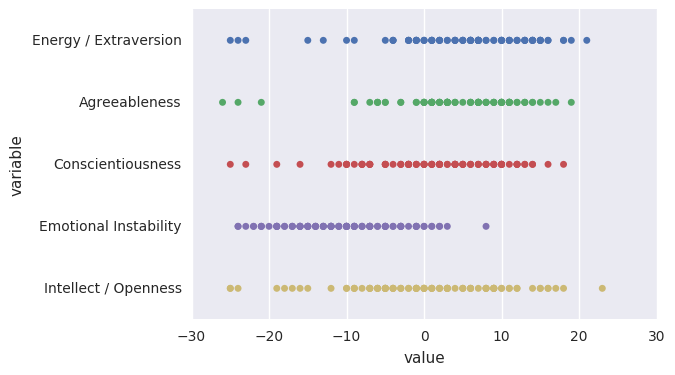

In [43]:
sns.stripplot(x = 'value', y = 'variable', data = fiveframe.melt(), orient = 'h')
plt.show()

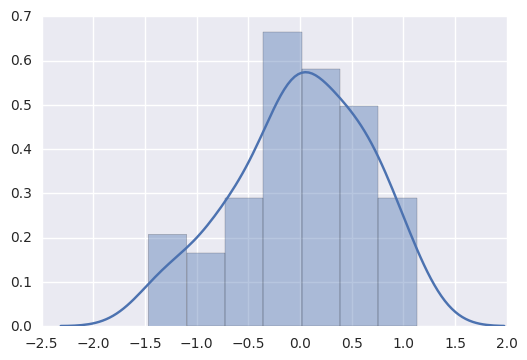

In [11]:
# take a look at the questions on the axes...
(np.sign(np.round(model.components_[0]/5)))

# Look at just the answers to the bigfive problems
one = X.iloc[:, 0:65]

sns.distplot(one.apply(np.mean, 0))
plt.show()